In [9]:
# importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset
from google.colab import files
uploaded = files.upload()
import pandas as pd
df = pd.read_csv("CarPrice_Assignment.csv")

# Check missing values
print(df.isnull().sum())

if 'car_ID' in df.columns:
    df.drop(columns=['car_ID'], inplace=True)

# Convert categorical features using One-Hot Encoding
df = pd.get_dummies(df, drop_first=True)

# Independent & dependent variables
X = df.drop('price', axis=1)
y = df['price']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Preprocessing Completed")


Saving CarPrice_Assignment.csv to CarPrice_Assignment (2).csv
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64
Preprocessing Completed


In [10]:

# STEP 2: implementing the model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR()
}

print("Models initialized successfully")


Models initialized successfully


In [11]:

# STEP 3: model evaluation(R2, MSE, MAE)


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results[name] = [r2, mse, mae]

results_df = pd.DataFrame(results, index=['R2 Score', 'MSE', 'MAE']).T
print("\n Model Evaluation Results:\n")
print(results_df)



 Model Evaluation Results:

                   R2 Score           MSE          MAE
Linear Regression  0.492455  4.006768e+07  4160.851580
Decision Tree      0.855898  1.137602e+07  2200.142268
Random Forest      0.953514  3.669818e+06  1363.569585
Gradient Boosting  0.930798  5.463056e+06  1696.862907
SVR               -0.101709  8.697331e+07  5705.033285


In [12]:
# Identify the best model
best_model_name = results_df['R2 Score'].idxmax()
print("\nBest Performing Model:", best_model_name)



Best Performing Model: Random Forest



 Feature Importance:

                              Feature  Importance
6                          enginesize    0.540808
5                          curbweight    0.294927
13                         highwaympg    0.043387
10                         horsepower    0.038275
3                            carwidth    0.013358
..                                ...         ...
118               CarName_subaru baja    0.000000
142          CarName_vokswagen rabbit    0.000000
147         CarName_volkswagen rabbit    0.000000
130  CarName_toyota corolla 1600 (sw)    0.000000
179              cylindernumber_three    0.000000

[189 rows x 2 columns]


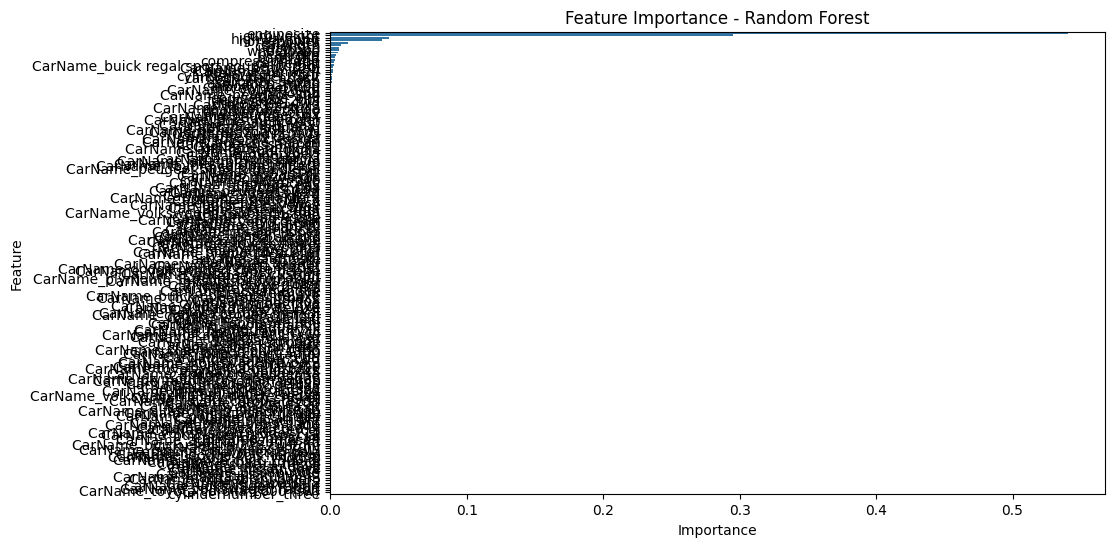

In [13]:

# STEP 4: Feature analysis


rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n Feature Importance:\n")
print(importances)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title("Feature Importance - Random Forest")
plt.show()


In [16]:

#  Tuning the BEST model

from sklearn.model_selection import GridSearchCV

if best_model_name == "Gradient Boosting":
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [2, 3, 5]
    }
    model_to_tune = GradientBoostingRegressor(random_state=42)

elif best_model_name == "Random Forest":
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 8, 12],
        'min_samples_split': [2, 5, 10]
    }
    model_to_tune = RandomForestRegressor(random_state=42)

else:
    print("Hyperparameter tuning supported only for Random Forest or Gradient Boosting.")
    param_grid = None

if param_grid:
    grid = GridSearchCV(model_to_tune, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
    grid.fit(X_train, y_train)

    print("\n Best Parameters:", grid.best_params_)
    best_model = grid.best_estimator_

    # Evaluate tuned model
    tuned_pred = best_model.predict(X_test)
    print("\n Performance After Tuning:")
    print("R2 Score:", r2_score(y_test, tuned_pred))
    print("MSE:", mean_squared_error(y_test, tuned_pred))
    print("MAE:", mean_absolute_error(y_test, tuned_pred))


print("\n All steps completed successfully.")



Fitting 5 folds for each of 27 candidates, totalling 135 fits

 Best Parameters: {'max_depth': 12, 'min_samples_split': 2, 'n_estimators': 300}

 Performance After Tuning:
R2 Score: 0.9543109641034295
MSE: 3606876.2037902866
MAE: 1323.753847170145

 All steps completed successfully.


In [17]:
# Predict car prices on test data
final_predictions = best_model.predict(X_test)

# Showing first 20 actual vs predicted values
comparison = pd.DataFrame({
    "Actual Price": y_test.values[:20],
    "Predicted Price": final_predictions[:20]
})

print("\n Actual vs Predicted Car Prices:")
print(comparison)



 Actual vs Predicted Car Prices:
    Actual Price  Predicted Price
0      30760.000     35571.248333
1      17859.167     18605.869876
2       9549.000      9003.363554
3      11850.000     13252.537721
4      28248.000     28325.177667
5       7799.000      6440.320433
6       7788.000      7788.641826
7       9258.000      7883.467739
8      10198.000     10134.317468
9       7775.000      8144.368663
10     13295.000     14665.160733
11      8238.000      7802.317580
12     18280.000     14295.238168
13      9988.000     10892.573370
14     40960.000     38249.373333
15      6488.000      6402.034543
16      5151.000      5699.545085
17     12629.000     13964.688966
18      8189.000      8863.293609
19      9960.000      9595.456926
